In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [6]:
DATADIR = "C:/Users/Dinara/Desktop/CNN/V2.Timber Tracker Datascience/Training Images"

In [7]:
CATEGORIES = ["Kohomba" , "Mahogani"]

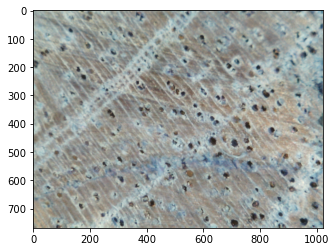

In [8]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to all the timber in
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [9]:
print(img_array.shape)

(768, 1024, 3)


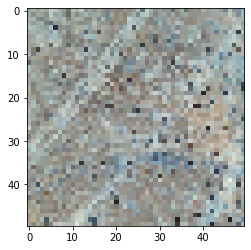

In [10]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [11]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to all timber dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [13]:
print(len(training_data))

227


In [14]:
import random

random.shuffle(training_data)

In [15]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
1
0
0
1
1
1


In [27]:
X = []
y = []

In [28]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [29]:
import pickle
#Serializing algorithm and saving it
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [30]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [31]:
X[1]

array([[[135, 153, 159],
        [130, 159, 162],
        [127, 160, 166],
        ...,
        [188, 198, 193],
        [192, 194, 185],
        [194, 195, 183]],

       [[136, 150, 155],
        [144, 164, 169],
        [180, 190, 180],
        ...,
        [196, 199, 189],
        [203, 206, 195],
        [202, 206, 195]],

       [[131, 146, 152],
        [122, 148, 156],
        [163, 174, 170],
        ...,
        [196, 198, 189],
        [193, 200, 190],
        [193, 198, 189]],

       ...,

       [[167, 164, 140],
        [162, 169, 154],
        [166, 174, 162],
        ...,
        [201, 207, 189],
        [205, 206, 187],
        [173, 186, 181]],

       [[161, 179, 172],
        [146, 157, 146],
        [142, 143, 129],
        ...,
        [191, 194, 183],
        [193, 198, 181],
        [202, 209, 196]],

       [[132, 160, 158],
        [142, 145, 129],
        [150, 153, 141],
        ...,
        [189, 194, 179],
        [118, 114, 124],
        [190, 203, 195]]